In [1]:
cd kshitij


C:\Users\kshit\kshitij


C:\Users\kshit\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
#trying new approach 

In [3]:
import pandas as pd

# Loading the data from CSV file
data = pd.read_csv("apogeeandgaiadr3.csv")
print(data.shape)
print("Removing negative parallaxes")
data = data[data.parallax>0]
print(data.shape)

# Extract columns
ra = data["ra"]
dec = data["dec"]
parallax = data["parallax"]
pmra = data["pmra"]
pmdec = data["pmdec"]
rv = data["radial_velocity"]

(206226, 43)
Removing negative parallaxes
(195416, 43)


In [4]:
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord
from astropy import units as u

# Convert to SkyCoord object 
dist = coord.Distance(parallax=u.Quantity(data['parallax'], u.mas),allow_negative=True)
c = SkyCoord(ra=ra.to_numpy()*u.deg, dec=dec.to_numpy()*u.deg, distance=dist, 
             pm_ra_cosdec=pmra.to_numpy()*u.mas/u.yr, pm_dec=pmdec.to_numpy()*u.mas/u.yr, 
             radial_velocity=rv.to_numpy()*u.km/u.s, frame='icrs')

In [5]:
from astropy.coordinates import Galactocentric

# Convert to Galactocentric coordinates
galactocentric = c.transform_to(Galactocentric(z_sun=17*u.pc, galcen_distance=8.178*u.kpc))


In [6]:
galactocentric

<SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.178 kpc, galcen_v_sun=(12.9, 245.6, 7.78) km / s, z_sun=17.0 pc, roll=0.0 deg): (x, y, z) in pc
    [( -8515.41450762,  689.58233888,  -43.58953998),
     ( -8492.85398919,  645.97032776,  -45.24480804),
     ( -8265.86455689,  323.84347228, -325.87789957), ...,
     ( -9747.15420297, 3101.75205093,  -24.44315509),
     ( -9333.48520088, 1967.40668883,  703.21017209),
     (-10280.08579885, 4319.6183531 , -412.32861454)]
 (v_x, v_y, v_z) in km / s
    [( 26.01926004, 227.40577593,  -1.76396025),
     ( 10.79490978, 225.18029726, -37.47974498),
     ( 30.98287495, 227.31146036,   6.29890845), ...,
     ( 23.86999906, 223.70006341,   7.8257326 ),
     (-41.64832639, 159.06848696,  46.16938404),
     (113.38767425, 211.76564114,  11.49183358)]>

In [7]:
import numpy as np
cylindrical = galactocentric.represent_as('cylindrical') #Converting into cylindrical 
#refernce : https://learn.astropy.org/tutorials/2-Coordinates-Transforms

# Access the components
R = cylindrical.rho
phi = cylindrical.phi
z = cylindrical.z

#velocities
vR = galactocentric.v_x*np.cos(phi)+galactocentric.v_y*np.sin(phi)
vphi = galactocentric.v_x*(-np.sin(phi))+galactocentric.v_y*np.cos(phi)
vz = galactocentric.v_z


In [8]:
print(vR)
print(vphi)
print(vz)

[ -7.57902118   6.3141678  -22.06024803 ...  45.0882412   73.56188813
 -22.49967296] km / s
[-228.76395533 -225.35045515 -228.35013468 ... -220.40541221 -147.05786361
 -239.15521352] km / s
[ -1.76396025 -37.47974498   6.29890845 ...   7.8257326   46.16938404
  11.49183358] km / s


In [9]:
print(R)
print(phi)
print(z)

[ 8543.29023495  8517.38495936  8272.20596137 ... 10228.77709416
  9538.58663924 11150.75184677] pc
[3.06079 rad 3.06568 rad 3.10243 rad ... 2.8335 rad 2.93384 rad 2.7438 rad]
[ -43.58953998  -45.24480804 -325.87789957 ...  -24.44315509  703.21017209
 -412.32861454] pc


In [10]:
# Create a DataFrame to store the data
data = {
    'R': R.value,       # R, z, and phi are pc, pc and rad respectively. vR, vphi, vz are in km/s 
    'phi': phi.value,
    'z': z.value,
    'vR': vR.value,
    'vphi': vphi.value,
    'vz': vz.value
}

df = pd.DataFrame(data)

# Save to CSV
df.to_csv('astropy_cylindrical_coordinates.csv', index=False)

print("Data saved to cylindrical_coordinates.csv")

Data saved to cylindrical_coordinates.csv


In [3]:
import pandas as pd
data = pd.read_csv("astropy_cylindrical_coordinates.csv")

In [4]:
data

R       phi            z          vR        vphi         vz
0        8543.290235  3.060789   -43.589540   -7.579021 -228.763955  -1.763960
1        8517.384959  3.065678   -45.244808    6.314168 -225.350455 -37.479745
2        8272.205961  3.102434  -325.877900  -22.060248 -228.350135   6.298908
3       11042.661726  2.756228  -245.992446    7.840192 -239.402378  -5.208782
4        9728.026815  2.888045     0.413888   48.470019 -196.701768  20.125834
...              ...       ...          ...         ...         ...        ...
195411  14582.838511  2.596304  1979.115045  106.217439  -63.988905  35.804473
195412  10604.644372  2.800406    60.198940    7.837647 -216.356233 -15.089116
195413  10228.777094  2.833504   -24.443155   45.088241 -220.405412   7.825733
195414   9538.586639  2.933844   703.210172   73.561888 -147.057864  46.169384
195415  11150.751847  2.743801  -412.328615  -22.499673 -239.155214  11.491834

[195416 rows x 6 columns]

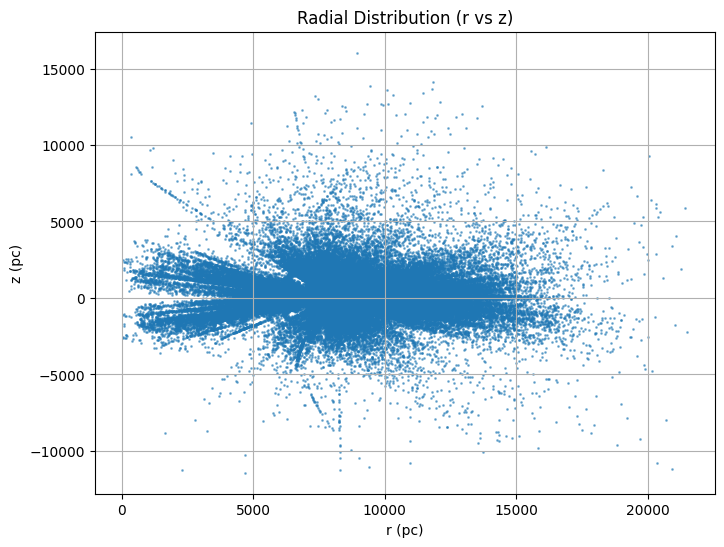

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns


# r vs z plot
plt.figure(figsize=(8, 6))
plt.scatter(data['R'], data['z'], s=1, alpha=0.5)
plt.title('Radial Distribution (r vs z)')
plt.xlabel('r (pc)')
plt.ylabel('z (pc)')
plt.grid(True)
plt.show()



Maria Ma'am sent new zip file of gaia tool on 7/10/24 

In [14]:
#!pip install gaia-tools-setup.zip

In [6]:
import pandas as pd
import gaia_tools as gaia

In [7]:
data1 = pd.read_csv('apogeeandgaiadr3.csv')
print(data1.shape)
print("Removing negative parallaxes")
data1 = data1[data1.parallax>0]
print(data1.shape)

(206226, 43)
Removing negative parallaxes
(195416, 43)


In [8]:
data1

source_id          ra        dec  ra_error  dec_error  \
0        422596679964513792    0.001332  57.619507  0.006814   0.006912   
2        421077597267551104    0.002913  57.173075  0.011544   0.011663   
3       2772097619417608704    0.004304  15.430911  0.014114   0.009799   
4        422775384964691328    0.018598  58.909154  0.015004   0.016282   
6        429530195985183744    0.022831  61.869629  0.011660   0.010069   
...                     ...         ...        ...       ...        ...   
206221  2229276283631858688  359.980415  75.192752  0.017108   0.015543   
206222  2013020767578111360  359.983672  62.853389  0.010355   0.010937   
206223  2011912391134705920  359.986237  61.523673  0.009974   0.009475   
206224  2282127264957087872  359.986642  79.302004  0.012074   0.011643   
206225  1995024236127760000  359.993193  57.012339  0.015119   0.015708   

        parallax  parallax_error  parallax_over_error      pmra  pmra_error  \
0       1.298531        0.009522           136.365260 -0.410274    0.008729   
2       1.386356        0.017567            78.917175  5.791725    0.016173   
3       2.084405        0.018037           115.560600 -3.242845    0.017113   
4       0.215558        0.021332            10.104780 -2.237697    0.019193   
6       0.365394        0.015404            23.720825  1.995410    0.014309   
...          ...             ...                  ...       ...         ...   
206221  0.112181        0.018317             6.124497  2.757045    0.021365   
206222  0.250876        0.013786            18.198004 -1.252002    0.013391   
206223  0.287660        0.012460            23.086440  0.008731    0.013660   
206224  0.419710        0.014970            28.037241  6.959700    0.014654   
206225  0.207336        0.021963             9.440200 -3.214342    0.019908   

        ...  VHELIO_AVG  VSCATTER   GAIAEDR3_SOURCE_ID  GAIAEDR3_PARALLAX  \
0       ...  -20.434650  0.163897   422596679964513792           1.298531   
2       ...  -12.673787  0.120245   421077597267551104           1.386356   
3       ...  -12.087924  0.073868  2772097619417608704           2.084405   
4       ...  -48.046894  0.031308   422775384964691328           0.215558   
6       ...  -33.456997  0.058489   429530195985183744           0.365394   
...     ...         ...       ...                  ...                ...   
206221  ...  -75.315130  0.015528  2229276283631858688           0.112181   
206222  ...  -58.584713  0.084613  2013020767578111360           0.250876   
206223  ...  -24.952900  0.087360  2011912391134705920           0.287660   
206224  ...  -38.772390  0.634081  2282127264957087872           0.419710   
206225  ...  -70.202610  0.042342  1995024236127760000           0.207336   

        GAIAEDR3_PARALLAX_ERROR       TEFF      LOGG       M_H   ALPHA_M  \
0                      0.009522  6162.0303  3.715561 -0.221510  0.048066   
2                      0.017567  5031.2637  3.456132 -0.160080  0.055704   
3                      0.018037  5945.7510  4.123192 -0.267040  0.012409   
4                      0.021332  4766.6274  2.420902 -0.075324  0.004258   
6                      0.015404  4073.7700  1.281504 -0.270330  0.055308   
...                         ...        ...       ...       ...       ...   
206221                 0.018317  4070.6270  1.771988  0.260530  0.018661   
206222                 0.013786  4291.0060  1.823921 -0.089454  0.044745   
206223                 0.012460  5008.3950  2.480740 -0.411640  0.029987   
206224                 0.014970  4311.3926  1.731429 -0.499090  0.246895   
206225                 0.021963  4954.1700  2.474665 -0.336430  0.088357   

           MG_FE  
0      -0.001095  
2       0.092060  
3       0.046251  
4      -0.001462  
6       0.087946  
...          ...  
206221  0.051398  
206222  0.077848  
206223  0.011976  
206224  0.296753  
206225  0.121476  

[195416 rows x 43 columns]

In [9]:
from gaia_tools import data_analysis

In [10]:
#trying to maintian source ids 
source_ids = data1['source_id'].values  # Store the source_id column

In [11]:
#Converting into galactocentric cylindrical Coordinate 
galcen = data_analysis.get_transformed_data(data1, include_cylindrical=True)
galcen.head()

x            y           z        v_x         v_y        v_z  \
0  -8515.415286   689.581971  -43.590099  24.219262  214.045772  -2.293950   
1  -8492.854734   645.969976  -45.245333   8.994865  211.820229 -38.009708   
2  -8265.865420   323.842891 -325.878264  29.182887  213.951474   5.768912   
3 -10232.812179  4150.903059 -245.995776  80.925466  211.432081  -5.738846   
4  -9417.010479  2440.175240    0.411975   0.620321  189.211161  19.595911   

              r       phi        v_r       v_phi  
0   8543.290981  3.060789  -6.863276 -215.302255  
1   8517.385675  3.065678   7.095772 -211.892348  
2   8272.206801  3.102434 -20.784678 -214.929922  
3  11042.664592  2.756228   4.486144 -226.345600  
4   9728.028658  2.888045  46.861171 -183.317426

In [12]:
# Add the source_id column back to the transformed data
galcen['source_id'] = source_ids

In [13]:
galcen

x            y            z         v_x         v_y  \
0       -8515.415286   689.581971   -43.590099   24.219262  214.045772   
1       -8492.854734   645.969976   -45.245333    8.994865  211.820229   
2       -8265.865420   323.842891  -325.878264   29.182887  213.951474   
3      -10232.812179  4150.903059  -245.995776   80.925466  211.432081   
4       -9417.010479  2440.175240     0.411975    0.620321  189.211161   
...              ...          ...          ...         ...         ...   
195411 -12468.003639  7563.606774  1979.109769  -59.424565   96.440333   
195412  -9993.378752  3548.367718    60.196179   63.208047  193.147639   
195413  -9747.156963  3101.750695   -24.445594   22.070017  210.340073   
195414  -9333.486014  1967.406755   703.208857  -43.448196  145.708505   
195415 -10280.090107  4319.615982  -412.332132  111.587702  198.405726   

              v_z             r       phi         v_r       v_phi  \
0       -2.293950   8543.290981  3.060789   -6.863276 -215.302255   
1      -38.009708   8517.385675  3.065678    7.095772 -211.892348   
2        5.768912   8272.206801  3.102434  -20.784678 -214.929922   
3       -5.738846  11042.664592  2.756228    4.486144 -226.345600   
4       19.595911   9728.028658  2.888045   46.861171 -183.317426   
...           ...           ...       ...         ...         ...   
195411  35.274768  14582.841362  2.596304  100.826884  -51.632900   
195412 -15.619128  10604.646734  2.800407    5.063525 -203.164043   
195413   7.295750  10228.779313  2.833504   42.752173 -207.128664   
195414  45.639584   9538.587449  2.933844   72.567456 -133.613915   
195415  10.961745  11150.754900  2.743801  -26.015735 -226.141171   

                  source_id  
0        422596679964513792  
1        421077597267551104  
2       2772097619417608704  
3        422775384964691328  
4        429530195985183744  
...                     ...  
195411  2229276283631858688  
195412  2013020767578111360  
195413  2011912391134705920  
195414  2282127264957087872  
195415  1995024236127760000  

[195416 rows x 11 columns]

Binning data from galactocentric input data...


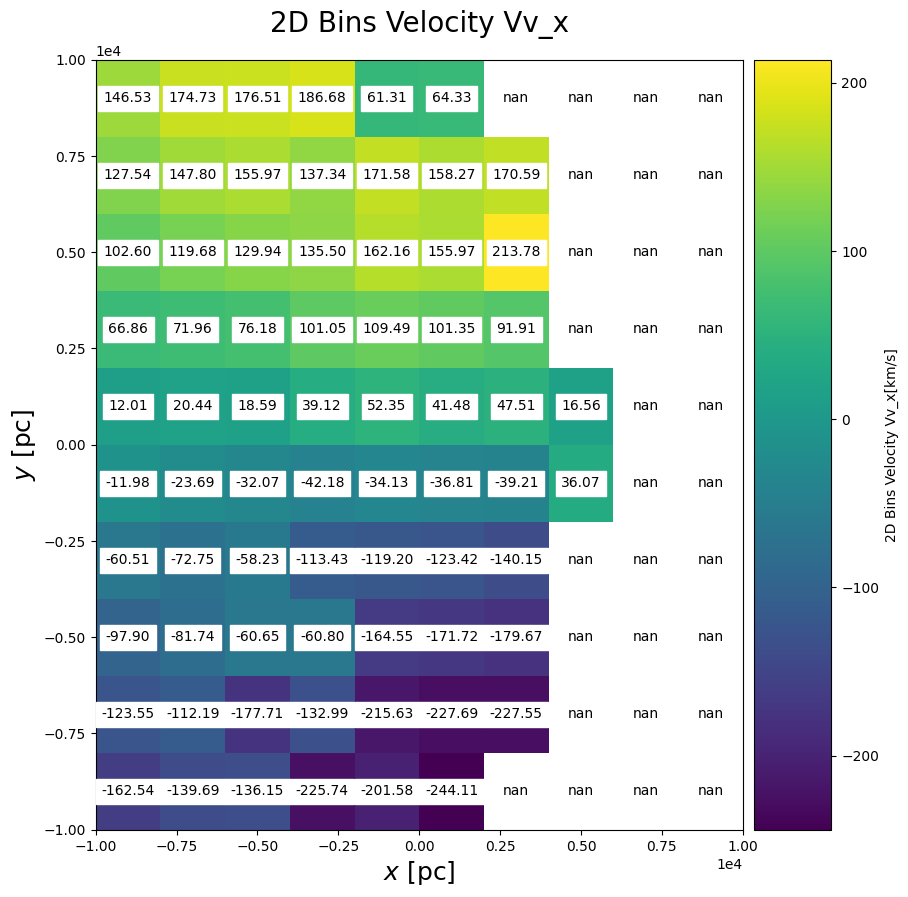

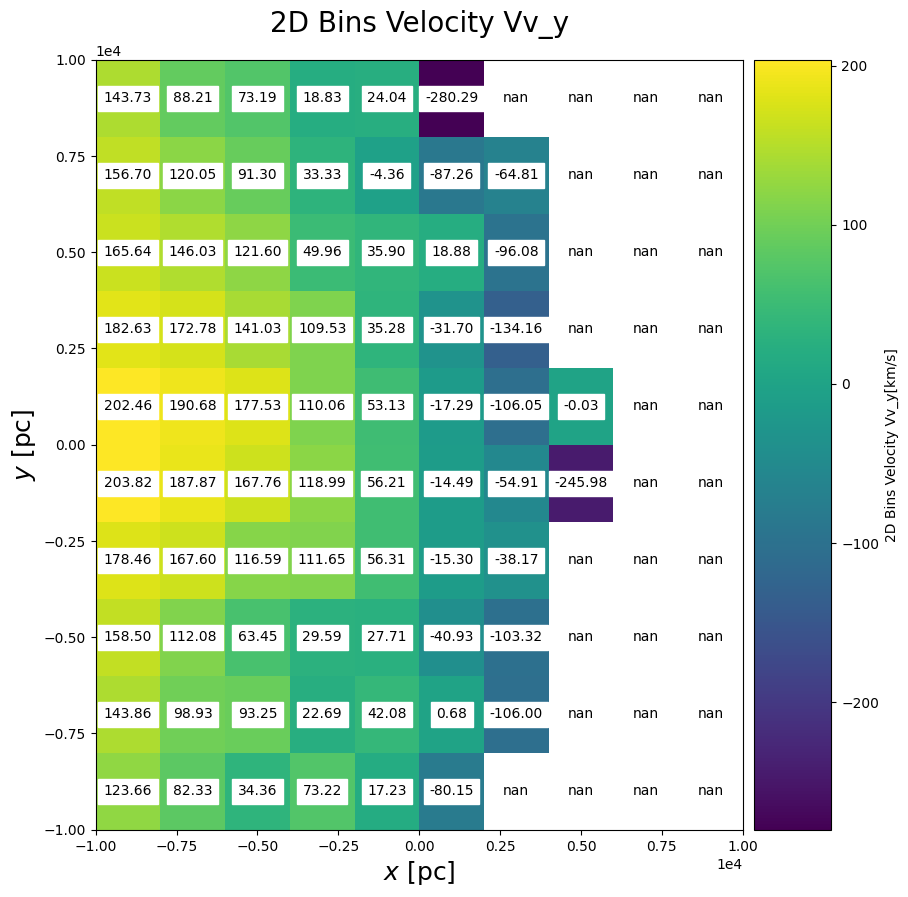

Time elapsed for binning data: 1.2644277999934275 sec


"This function bins the transformed stellar data (in the Galactocentric frame) based on their spatial positions in the x, y, and z coordinates. \nIt is useful for organizing the data for visualization and velocity field plotting. The actual binning is performed using \n'scipy.stats.binned_statistic_2d'. This function bins the x and y coordinates and calculates the mean of the velocity components \nwithin each bin. It also returns the edges of the bins and the bin number for each data point."

In [14]:
data_analysis.bin_data(galcen, show_bins = True, debug = True)
'''This function bins the transformed stellar data (in the Galactocentric frame) based on their spatial positions in the x, y, and z coordinates. 
It is useful for organizing the data for visualization and velocity field plotting. The actual binning is performed using 
'scipy.stats.binned_statistic_2d'. This function bins the x and y coordinates and calculates the mean of the velocity components 
within each bin. It also returns the edges of the bins and the bin number for each data point.'''

In [15]:
BL_r_max = max(galcen.r)
print(BL_r_max)
BL_r_min = min(galcen.r)
print(BL_r_min)
BL_z_max = max(galcen.z)
print(BL_z_max)
BL_z_min = min(galcen.z)
print(BL_z_min)

21472.013237107727
49.45119840053237
16033.847979188242
-11424.937974535347


In [16]:
'''This function bins data in cylindrical coordinates (r-z plane) from galactocentric input, 
focusing on how data points are distributed across these spatial dimensions.'''

bins   = data_analysis.get_collapsed_bins(galcen,(0,0),BL_r_min, BL_r_max, BL_z_min,BL_z_max, (10,1))

In [17]:
bins

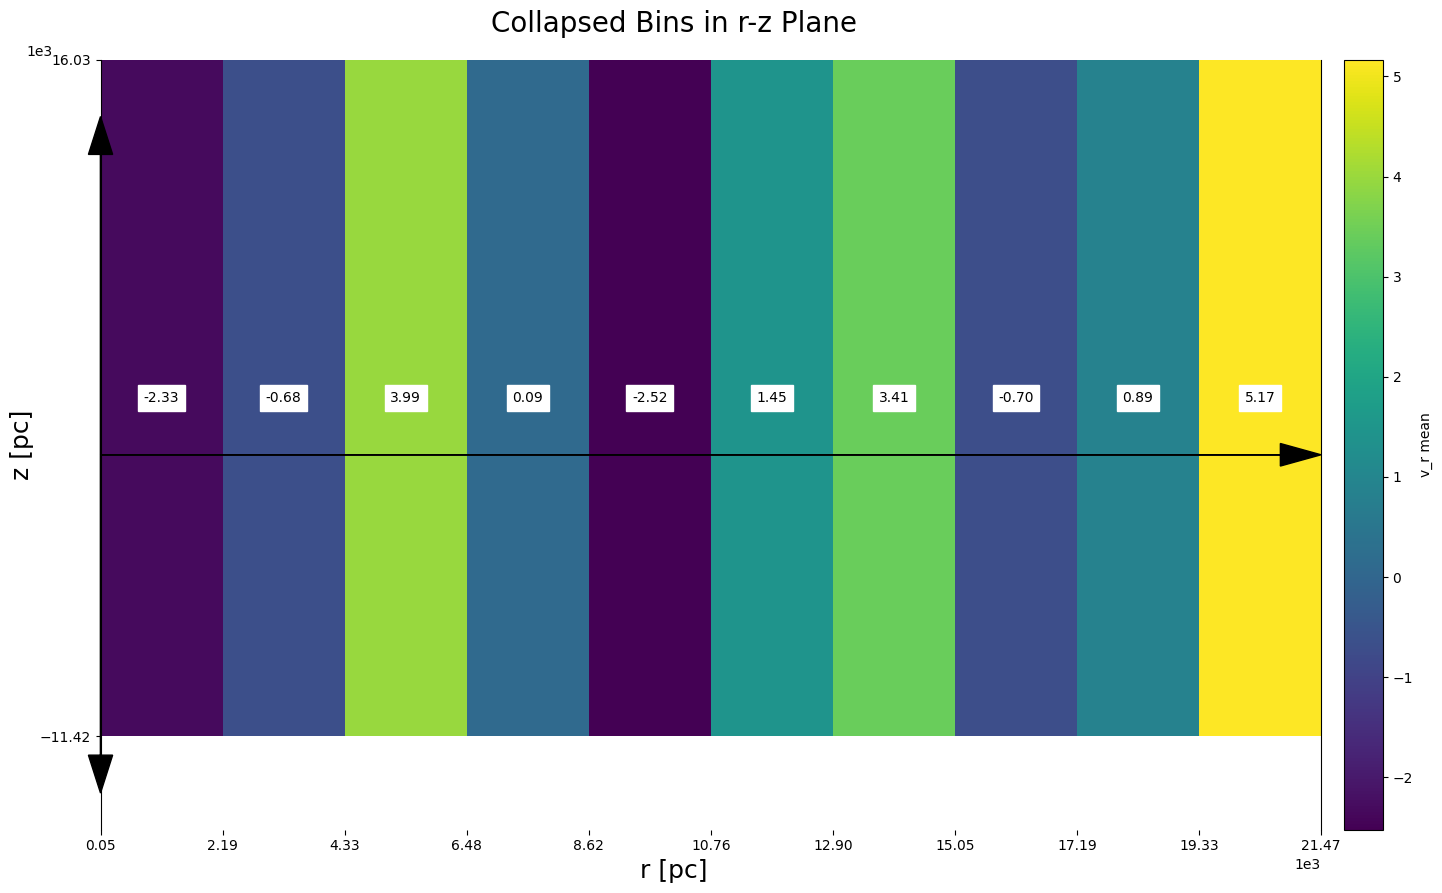

In [18]:
from gaia_tools import data_plot
data_plot.plot_collapsed_bins(bins, 'v_r')


In [28]:
#help(data_analysis.get_collapsed_bins)

Let's compare the individual coloumns from Astropy data and Gaia tools. 

1) Radial Distribution 

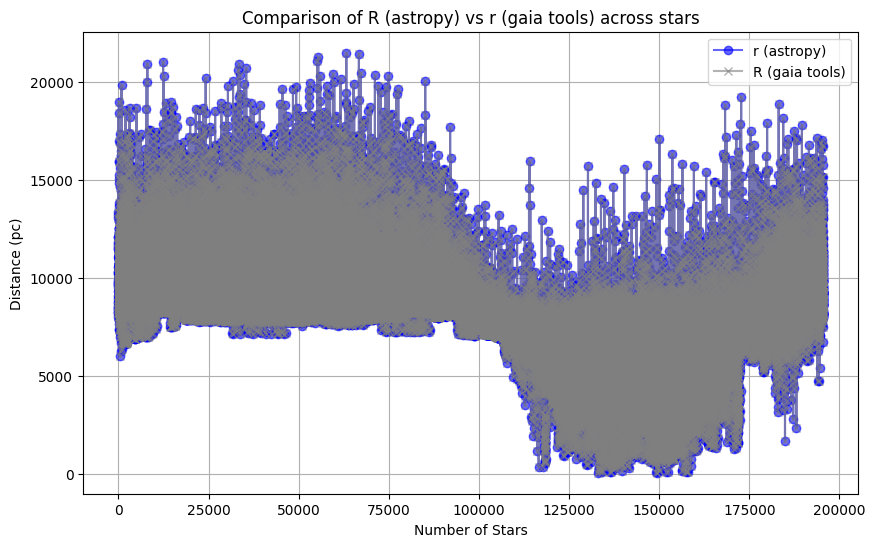

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting r from astropy in blue
plt.plot(range(len(galcen['r'])), data['R'], color='blue', label='r (astropy)', alpha=0.6, linestyle='-', marker='o')

# Plotting R from gaia tools in red
plt.plot(range(len(galcen['r'])), galcen['r'], color='grey', label='R (gaia tools)', alpha=0.6, linestyle='-', marker='x')

# Adding title and labels
plt.title('Comparison of R (astropy) vs r (gaia tools) across stars')
plt.xlabel('Number of Stars')
plt.ylabel('Distance (pc)')

# Adding grid and legend
plt.grid(True)
plt.legend()

# Displaying the plot
plt.show()


Z- distribution 

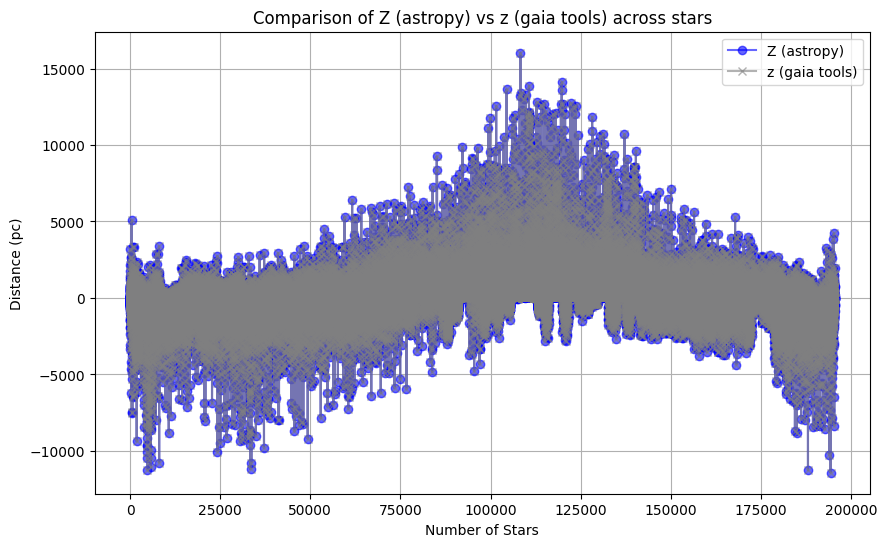

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting Z from astropy in blue
plt.plot(range(len(galcen['z'])), data['z'], color='blue', label='Z (astropy)', alpha=0.6, linestyle='-', marker='o')

# Plotting z from gaia tools in red
plt.plot(range(len(galcen['z'])), galcen['z'], color='grey', label='z (gaia tools)', alpha=0.6, linestyle='-', marker='x')

# Adding title and labels
plt.title('Comparison of Z (astropy) vs z (gaia tools) across stars')
plt.xlabel('Number of Stars')
plt.ylabel('Distance (pc)')

# Adding grid and legend
plt.grid(True)
plt.legend()

# Displaying the plot
plt.show()


phi distribution

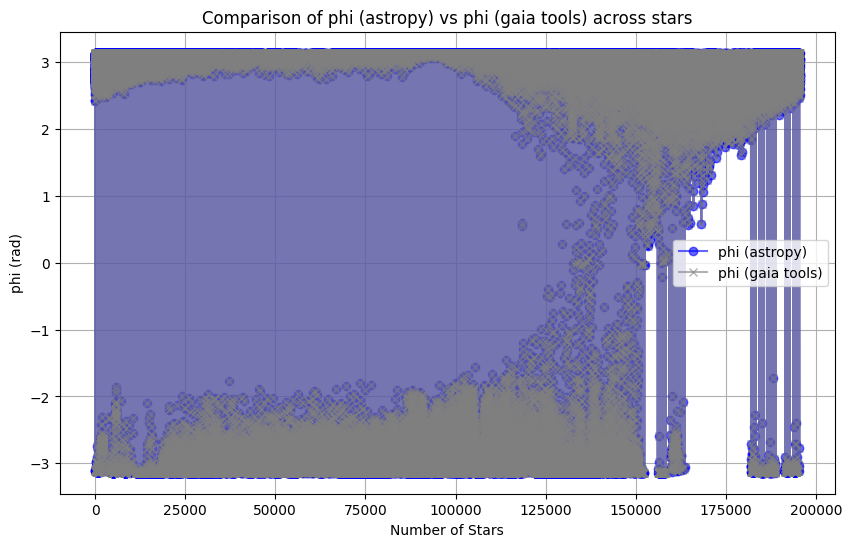

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting phi from astropy in blue
plt.plot(range(len(galcen['phi'])), data['phi'], color='blue', label='phi (astropy)', alpha=0.6, linestyle='-', marker='o')

# Plotting phi from gaia tools in red
plt.plot(range(len(galcen['phi'])), galcen['phi'], color='grey', label='phi (gaia tools)', alpha=0.6, linestyle='-', marker='x')

# Adding title and labels
plt.title('Comparison of phi (astropy) vs phi (gaia tools) across stars')
plt.xlabel('Number of Stars')
plt.ylabel('phi (rad)')

# Adding grid and legend
plt.grid(True)
plt.legend()

# Displaying the plot
plt.show()


Vr Dsitribution

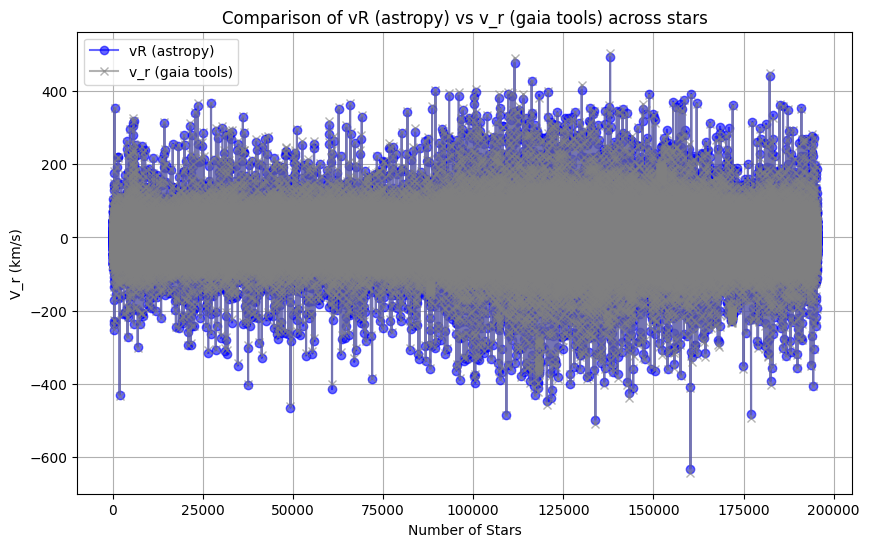

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting vR from astropy in blue
plt.plot(range(len(galcen['v_r'])), data['vR'], color='blue', label='vR (astropy)', alpha=0.6, linestyle='-', marker='o')

# Plotting v_r from gaia tools in red
plt.plot(range(len(galcen['v_r'])), galcen['v_r'], color='grey', label='v_r (gaia tools)', alpha=0.6, linestyle='-', marker='x')

# Adding title and labels
plt.title('Comparison of vR (astropy) vs v_r (gaia tools) across stars')
plt.xlabel('Number of Stars')
plt.ylabel('V_r (km/s)')

# Adding grid and legend
plt.grid(True)
plt.legend()

# Displaying the plot
plt.show()


Vz distribution 

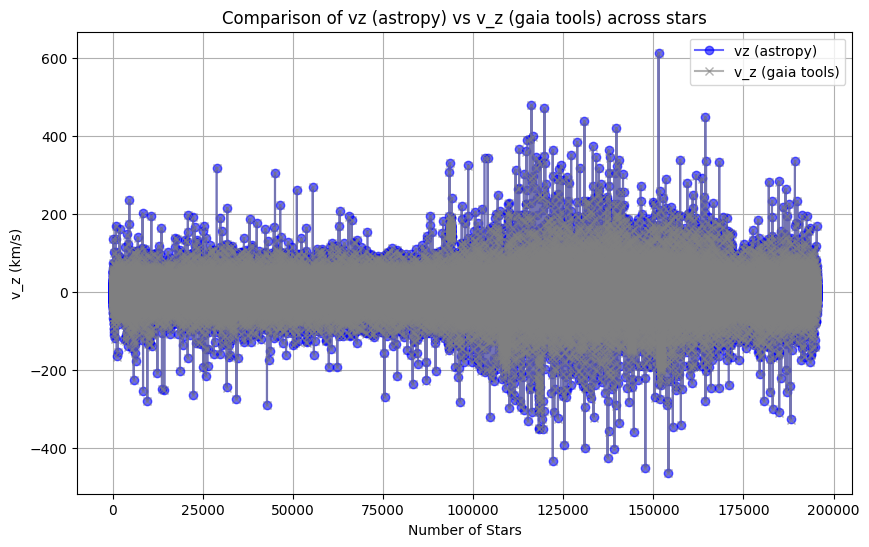

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting vz from astropy in blue
plt.plot(range(len(galcen['v_z'])), data['vz'], color='blue', label='vz (astropy)', alpha=0.6, linestyle='-', marker='o')

# Plotting v_z from gaia tools in red
plt.plot(range(len(galcen['v_z'])), galcen['v_z'], color='grey', label='v_z (gaia tools)', alpha=0.6, linestyle='-', marker='x')

# Adding title and labels
plt.title('Comparison of vz (astropy) vs v_z (gaia tools) across stars')
plt.xlabel('Number of Stars')
plt.ylabel('v_z (km/s)')

# Adding grid and legend
plt.grid(True)
plt.legend()

# Displaying the plot
plt.show()


v_phi distribution

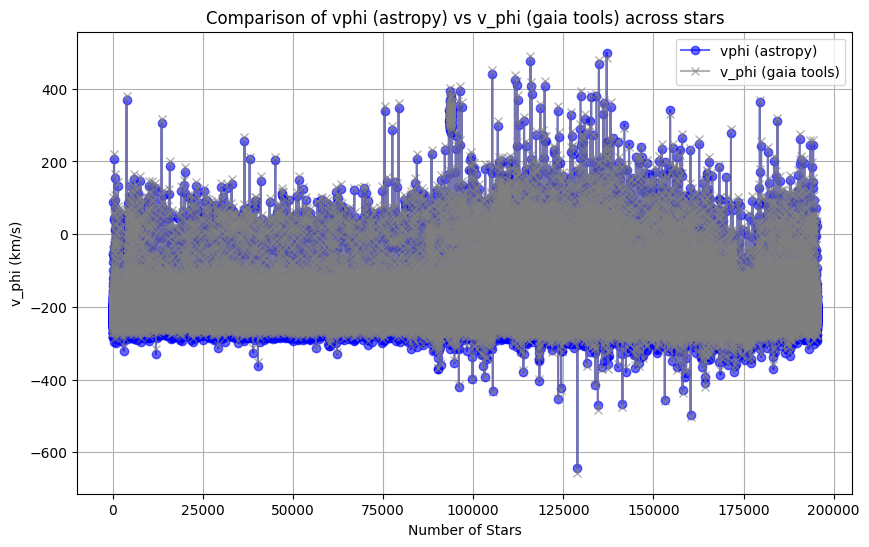

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting vphi from astropy in blue
plt.plot(range(len(galcen['v_phi'])), data['vphi'], color='blue', label='vphi (astropy)', alpha=0.6, linestyle='-', marker='o')

# Plotting v_phi from gaia tools in red
plt.plot(range(len(galcen['v_phi'])), galcen['v_phi'], color='grey', label='v_phi (gaia tools)', alpha=0.6, linestyle='-', marker='x')

# Adding title and labels
plt.title('Comparison of vphi (astropy) vs v_phi (gaia tools) across stars')
plt.xlabel('Number of Stars')
plt.ylabel('v_phi (km/s)')

# Adding grid and legend
plt.grid(True)
plt.legend()

# Displaying the plot
plt.show()


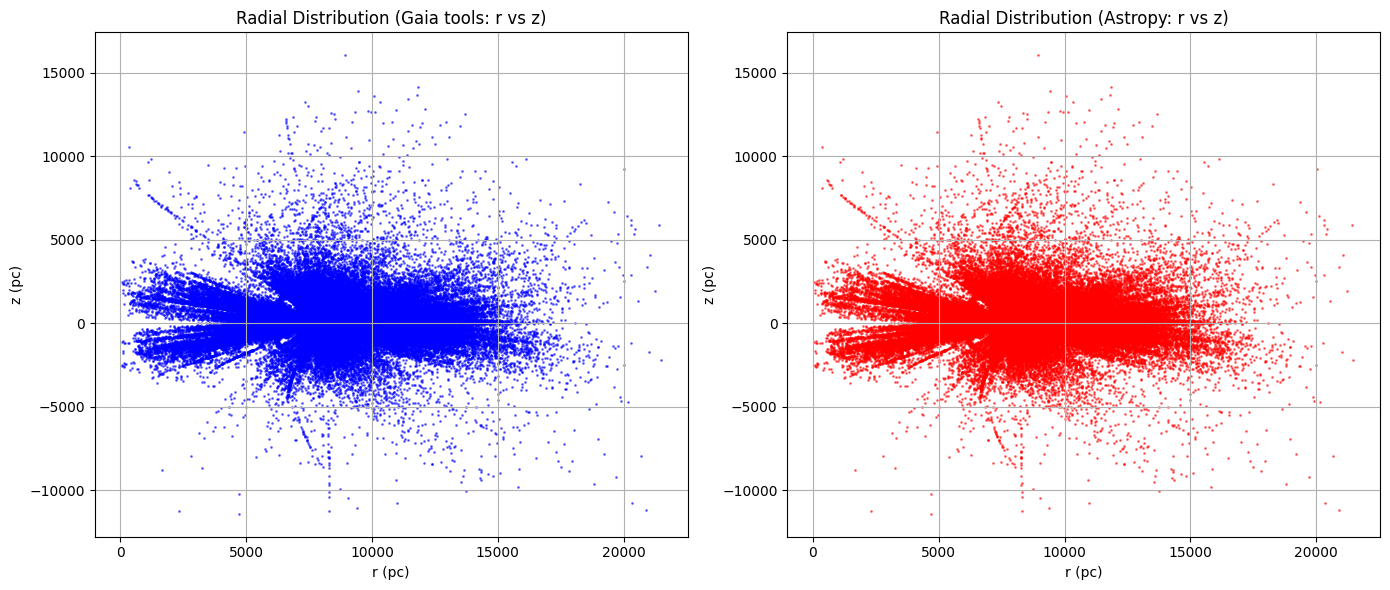

In [23]:
# Create figure to plot two plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Gaia tools data 
axes[0].scatter(galcen['r'], galcen['z'], s=1, alpha=0.5, color='blue')
axes[0].set_title('Radial Distribution (Gaia tools: r vs z)')
axes[0].set_xlabel('r (pc)')
axes[0].set_ylabel('z (pc)')
#axes[0].xaxis.set_major_locator(plt.MultipleLocator(1000))  # Major ticks at every 1000 pc
#axes[0].yaxis.set_major_locator(plt.MultipleLocator(1000))  # Major ticks at every 1000 pc
axes[0].grid(True)

# Second plot: Astropy
axes[1].scatter(data['R'], data['z'], s=1, alpha=0.5, color='red')
axes[1].set_title('Radial Distribution (Astropy: r vs z)')
axes[1].set_xlabel('r (pc)')
axes[1].set_ylabel('z (pc)')
#axes[1].xaxis.set_major_locator(plt.MultipleLocator(1000))  # Major ticks at every 1000 pc
#axes[1].yaxis.set_major_locator(plt.MultipleLocator(1000))  # Major ticks at every 1000 pc
axes[1].grid(True)

# Adjust layout to prevent overlap

plt.tight_layout()

# Show both plots side by side
plt.show()



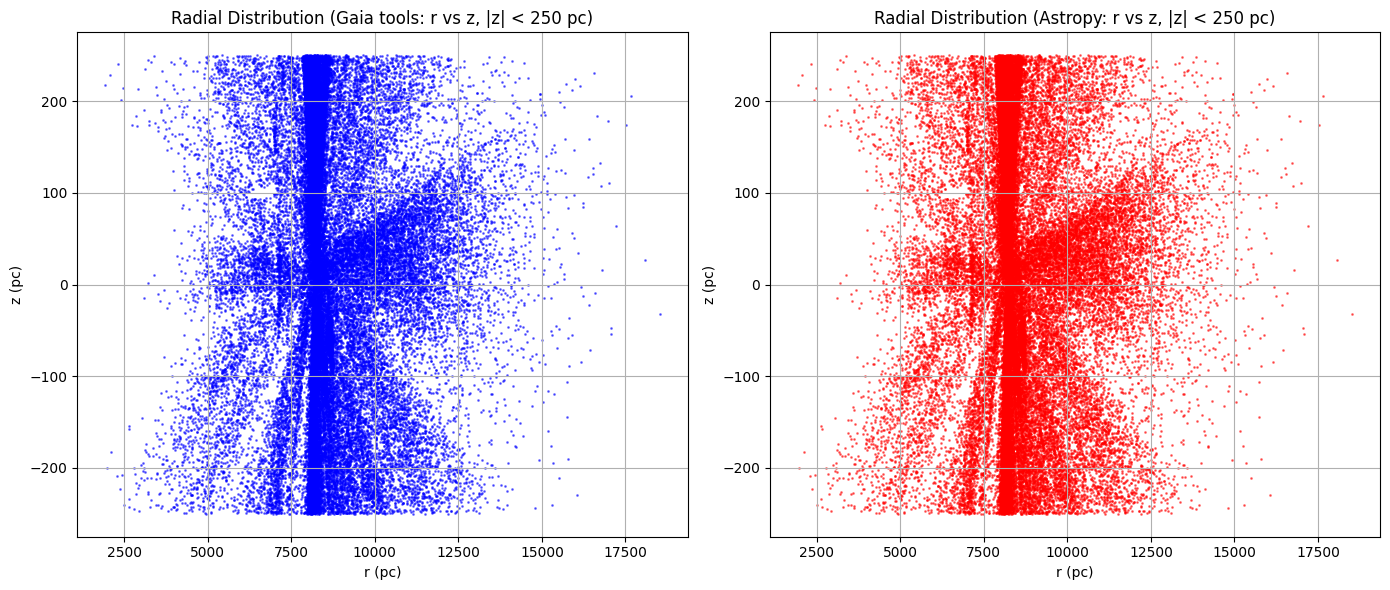

In [37]:
# Define the range for z values near the Galactic plane
z_threshold = 250  

# Filter data from Gaia tools (blue) and Astropy tools (red)
galcen_filtered = galcen[(galcen['z'] > -z_threshold) & (galcen['z'] < z_threshold)]
data_filtered = data[(data['z'] > -z_threshold) & (data['z'] < z_threshold)]

# Create figure with 1 row and 2 columns for the subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Gaia tools 
axes[0].scatter(galcen_filtered['r'], galcen_filtered['z'], s=1, alpha=0.5, color='blue')
axes[0].set_title('Radial Distribution (Gaia tools: r vs z, |z| < 250 pc)')
axes[0].set_xlabel('r (pc)')
axes[0].set_ylabel('z (pc)')
axes[0].grid(True)

# Second plot: Astropy
axes[1].scatter(data_filtered['R'], data_filtered['z'], s=1, alpha=0.5, color='red')
axes[1].set_title('Radial Distribution (Astropy: r vs z, |z| < 250 pc)')
axes[1].set_xlabel('r (pc)')
axes[1].set_ylabel('z (pc)')
axes[1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show both plots side by side
plt.show()


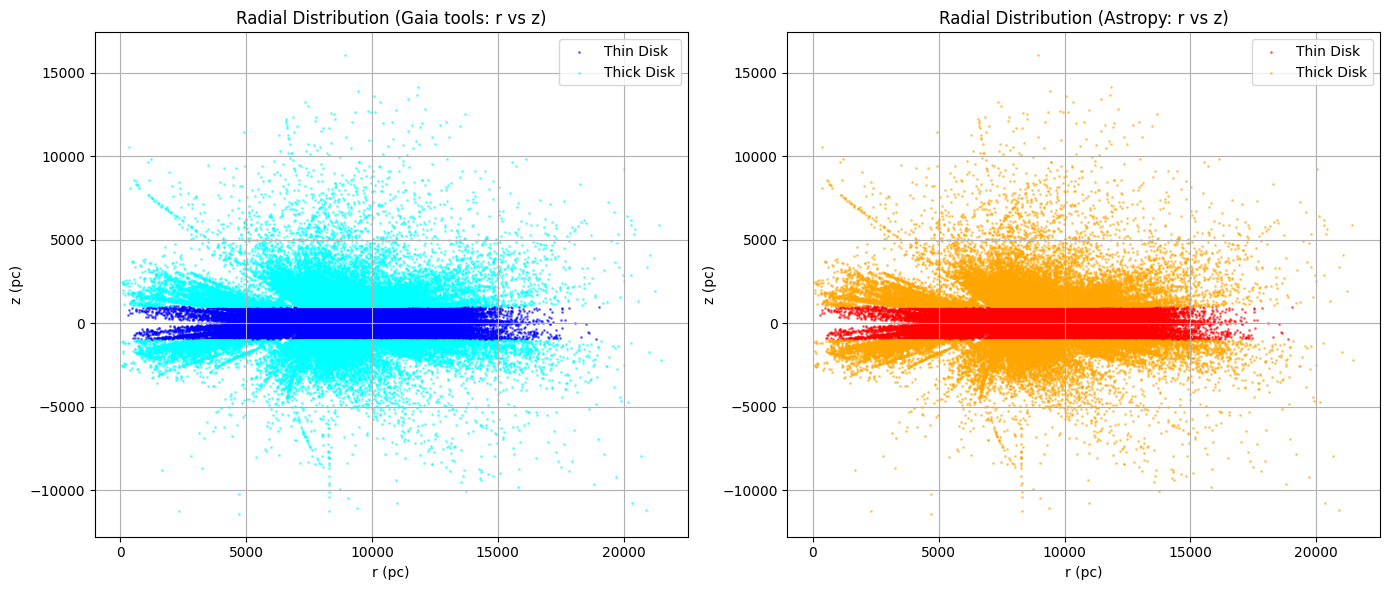

In [38]:
# Define thresholds for the thin and thick disk
thin_disk_threshold = 1000  # Stars within 1000 pc of the Galactic plane are in the thin disk

# Filter thin and thick disk stars for Gaia tools and Astropy tools

galcen_thin_disk = galcen[(galcen['z'] > -thin_disk_threshold) & (galcen['z'] < thin_disk_threshold)]
galcen_thick_disk = galcen[(galcen['z'] <= -thin_disk_threshold) | (galcen['z'] >= thin_disk_threshold)]

data_thin_disk = data[(data['z'] > -thin_disk_threshold) & (data['z'] < thin_disk_threshold)]
data_thick_disk = data[(data['z'] <= -thin_disk_threshold) | (data['z'] >= thin_disk_threshold)]

# Create figure with 1 row and 2 columns for the subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Gaia tools (blue)
axes[0].scatter(galcen_thin_disk['r'], galcen_thin_disk['z'], s=1, alpha=0.5, color='blue', label='Thin Disk')
axes[0].scatter(galcen_thick_disk['r'], galcen_thick_disk['z'], s=1, alpha=0.5, color='cyan', label='Thick Disk')
axes[0].set_title('Radial Distribution (Gaia tools: r vs z)')
axes[0].set_xlabel('r (pc)')
axes[0].set_ylabel('z (pc)')
axes[0].grid(True)
axes[0].legend()

# Plot for Astropy (red)
axes[1].scatter(data_thin_disk['R'], data_thin_disk['z'], s=1, alpha=0.5, color='red', label='Thin Disk')
axes[1].scatter(data_thick_disk['R'], data_thick_disk['z'], s=1, alpha=0.5, color='orange', label='Thick Disk')
axes[1].set_title('Radial Distribution (Astropy: r vs z)')
axes[1].set_xlabel('r (pc)')
axes[1].set_ylabel('z (pc)')
axes[1].grid(True)
axes[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show both plots side by side
plt.show()


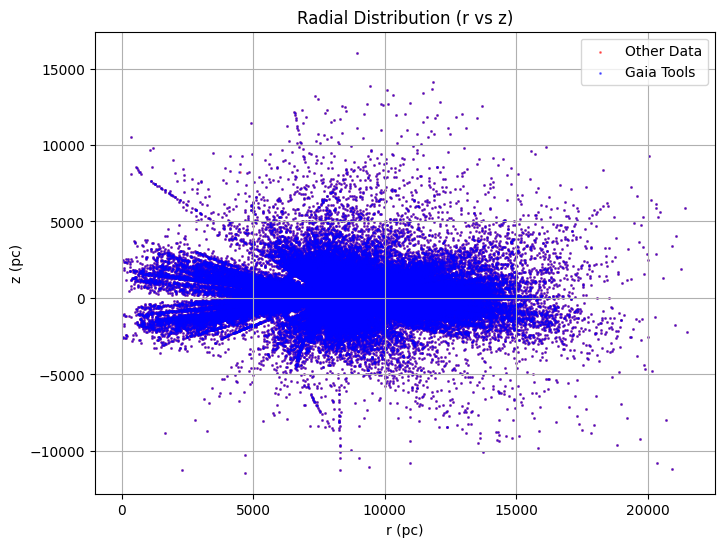

In [30]:
plt.figure(figsize=(8, 6))
# Plot for astropy
plt.scatter(data['R'], data['z'], s=1, alpha=0.5, color='red', label='Astropy')


# Plot for gaia tools
plt.scatter(galcen['r'], galcen['z'], s=1, alpha=0.5, color='blue', label='Gaia Tools')

# Adding title and labels
plt.title('Radial Distribution (r vs z)')
plt.xlabel('r (pc)')
plt.ylabel('z (pc)')
plt.grid(True)

# Adding a legend to distinguish the two datasets
plt.legend()

# Show plot
plt.show()


R vs v_phi

r vs phi 

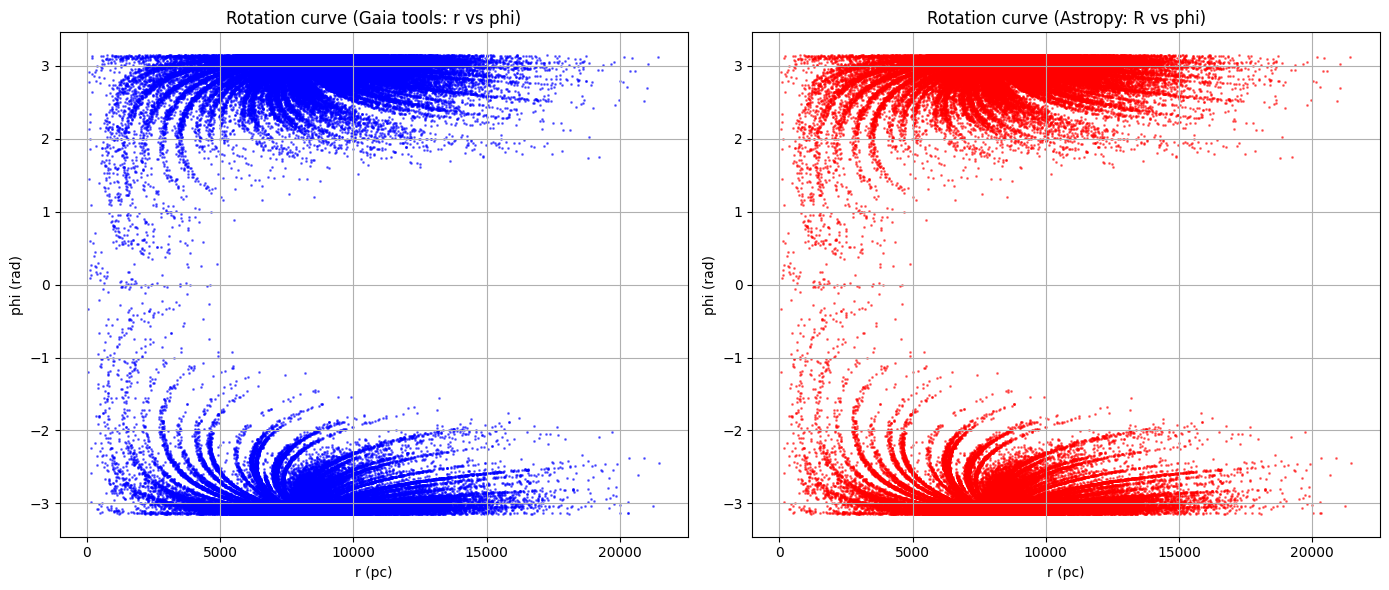

In [52]:
import numpy as np

# Create figure to plot two plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Gaia tools data 
axes[0].scatter(galcen['r'], galcen[('phi')], s=1, alpha=0.5, color='blue')
axes[0].set_title('Rotation curve (Gaia tools: r vs phi)')
axes[0].set_xlabel('r (pc)')
axes[0].set_ylabel('phi (rad)')
#axes[0].xaxis.set_major_locator(plt.MultipleLocator(1000))  # Major ticks at every 1000 pc
#axes[0].yaxis.set_major_locator(plt.MultipleLocator(1000))  # Major ticks at every 1000 pc
axes[0].grid(True)

# Second plot: Astropy
axes[1].scatter(data['R'], data[('phi')], s=1, alpha=0.5, color='red')
axes[1].set_title('Rotation curve (Astropy: R vs phi)')
axes[1].set_xlabel('r (pc)')
axes[1].set_ylabel('phi (rad)')
#axes[1].xaxis.set_major_locator(plt.MultipleLocator(1000))  # Major ticks at every 1000 pc
#axes[1].yaxis.set_major_locator(plt.MultipleLocator(1000))  # Major ticks at every 1000 pc
axes[1].grid(True)

# Adjust layout to prevent overlap

plt.tight_layout()

# Show both plots side by side
plt.show()



r vs vr 

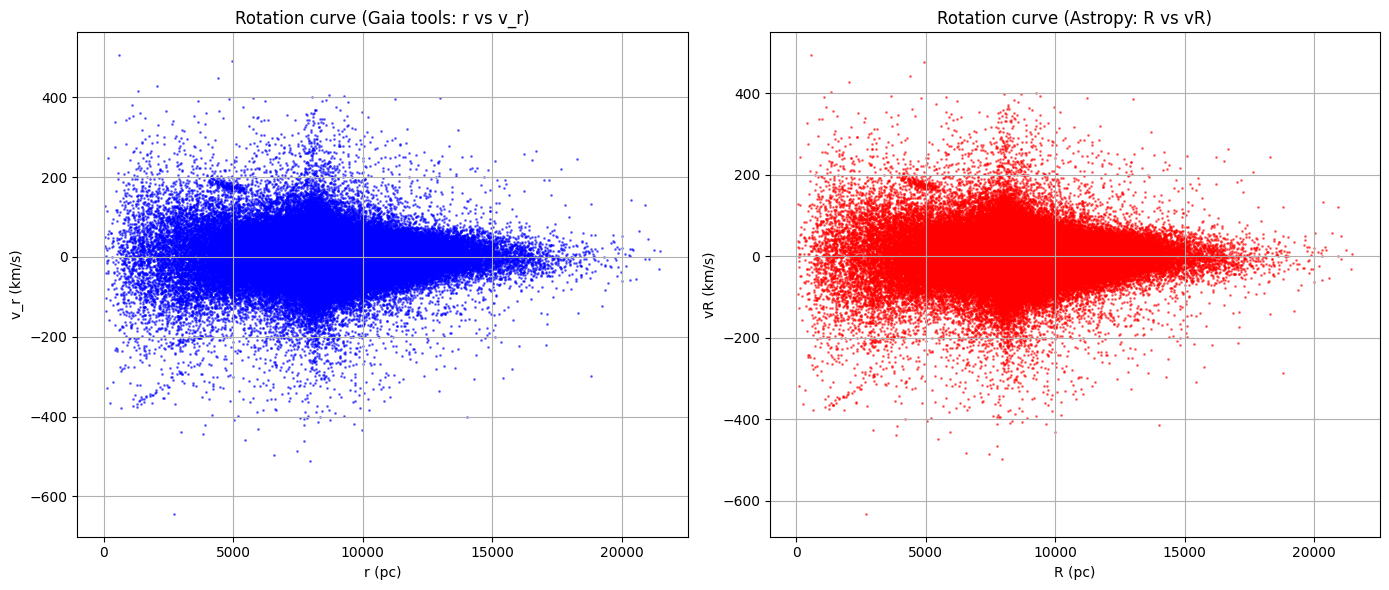

In [55]:
import numpy as np

# Create figure to plot two plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Gaia tools data 
axes[0].scatter(galcen['r'], galcen[('v_r')], s=1, alpha=0.5, color='blue')
axes[0].set_title('Rotation curve (Gaia tools: r vs v_r)')
axes[0].set_xlabel('r (pc)')
axes[0].set_ylabel('v_r (km/s)')
#axes[0].xaxis.set_major_locator(plt.MultipleLocator(1000))  # Major ticks at every 1000 pc
#axes[0].yaxis.set_major_locator(plt.MultipleLocator(1000))  # Major ticks at every 1000 pc
axes[0].grid(True)

# Second plot: Astropy
axes[1].scatter(data['R'], data[('vR')], s=1, alpha=0.5, color='red')
axes[1].set_title('Rotation curve (Astropy: R vs vR)')
axes[1].set_xlabel('R (pc)')
axes[1].set_ylabel('vR (km/s)')
#axes[1].xaxis.set_major_locator(plt.MultipleLocator(1000))  # Major ticks at every 1000 pc
#axes[1].yaxis.set_major_locator(plt.MultipleLocator(1000))  # Major ticks at every 1000 pc
axes[1].grid(True)

# Adjust layout to prevent overlap

plt.tight_layout()

# Show both plots side by side
plt.show()



r vs Vz 

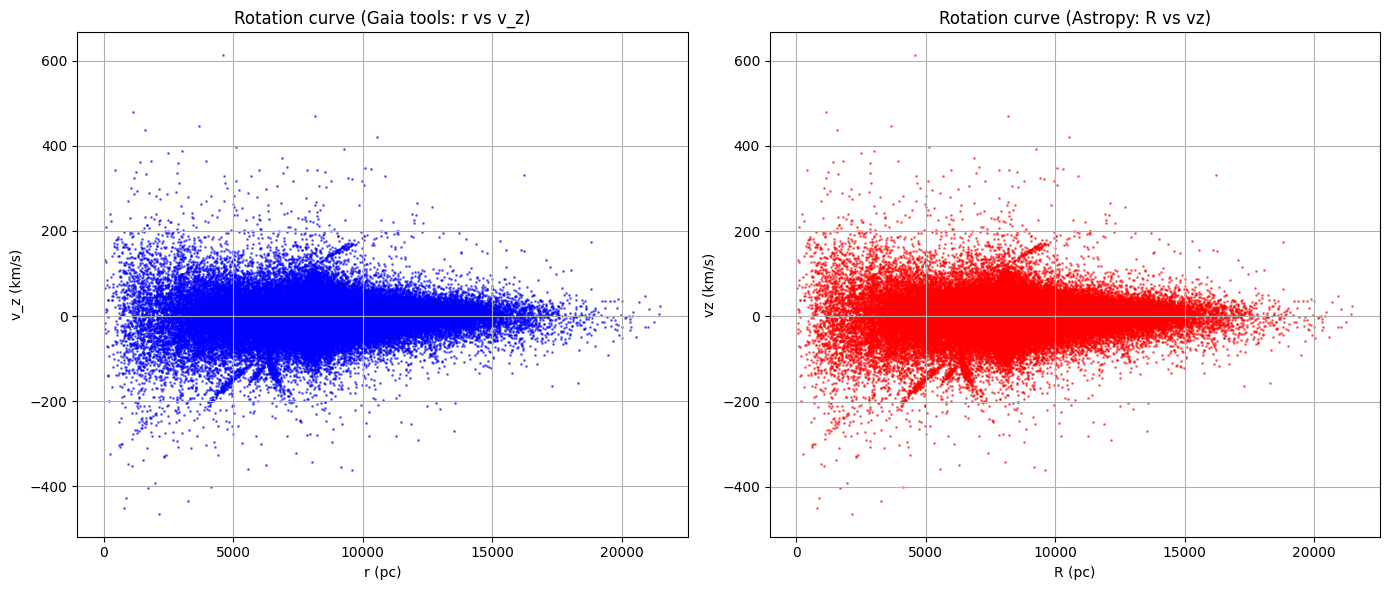

In [56]:
import numpy as np

# Create figure to plot two plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Gaia tools data 
axes[0].scatter(galcen['r'], galcen[('v_z')], s=1, alpha=0.5, color='blue')
axes[0].set_title('Rotation curve (Gaia tools: r vs v_z)')
axes[0].set_xlabel('r (pc)')
axes[0].set_ylabel('v_z (km/s)')
#axes[0].xaxis.set_major_locator(plt.MultipleLocator(1000))  # Major ticks at every 1000 pc
#axes[0].yaxis.set_major_locator(plt.MultipleLocator(1000))  # Major ticks at every 1000 pc
axes[0].grid(True)

# Second plot: Astropy
axes[1].scatter(data['R'], data[('vz')], s=1, alpha=0.5, color='red')
axes[1].set_title('Rotation curve (Astropy: R vs vz)')
axes[1].set_xlabel('R (pc)')
axes[1].set_ylabel('vz (km/s)')
#axes[1].xaxis.set_major_locator(plt.MultipleLocator(1000))  # Major ticks at every 1000 pc
#axes[1].yaxis.set_major_locator(plt.MultipleLocator(1000))  # Major ticks at every 1000 pc
axes[1].grid(True)

# Adjust layout to prevent overlap

plt.tight_layout()

# Show both plots side by side
plt.show()



r vs vphi

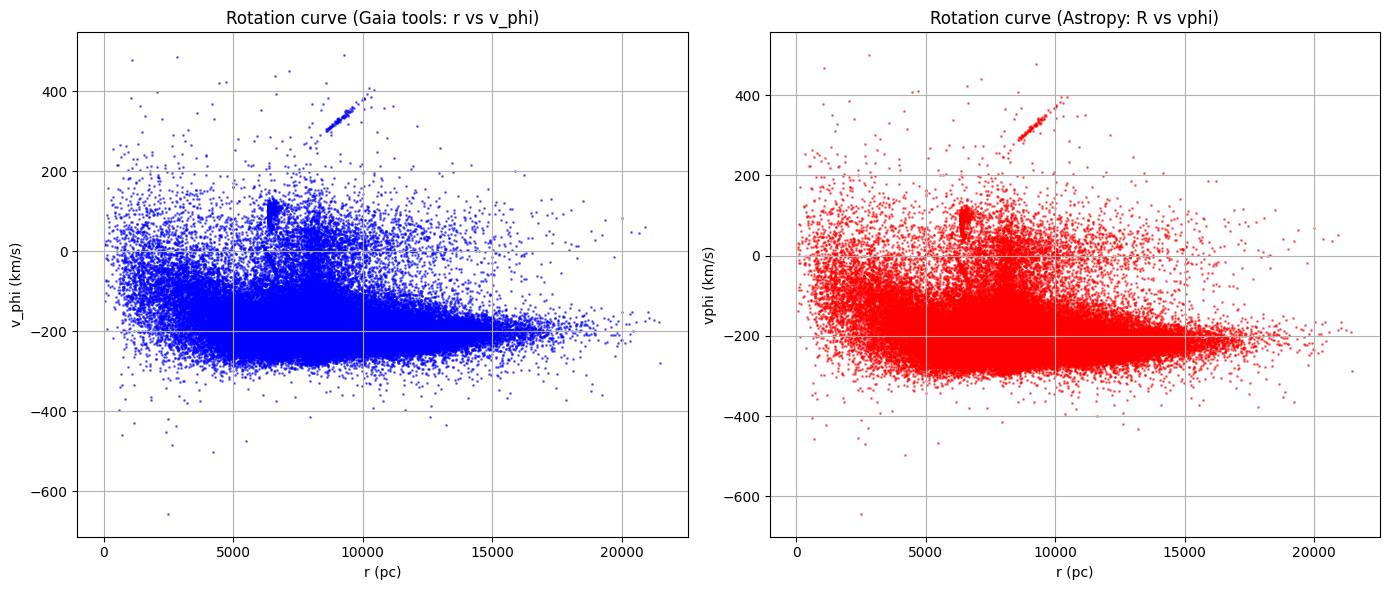

In [51]:
import numpy as np

# Create figure to plot two plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Gaia tools data 
axes[0].scatter(galcen['r'], galcen[('v_phi')], s=1, alpha=0.5, color='blue')
axes[0].set_title('Rotation curve (Gaia tools: v_phi vs r)')
axes[0].set_xlabel('r (pc)')
axes[0].set_ylabel('v_phi (km/s)')
#axes[0].xaxis.set_major_locator(plt.MultipleLocator(1000))  # Major ticks at every 1000 pc
#axes[0].yaxis.set_major_locator(plt.MultipleLocator(1000))  # Major ticks at every 1000 pc
axes[0].grid(True)

# Second plot: Astropy
axes[1].scatter(data['R'], data[('vphi')], s=1, alpha=0.5, color='red')
axes[1].set_title('Rotation curve (Astropy: vphi vs R)')
axes[1].set_xlabel('r (pc)')
axes[1].set_ylabel('vphi (km/s)')
#axes[1].xaxis.set_major_locator(plt.MultipleLocator(1000))  # Major ticks at every 1000 pc
#axes[1].yaxis.set_major_locator(plt.MultipleLocator(1000))  # Major ticks at every 1000 pc
axes[1].grid(True)

# Adjust layout to prevent overlap

plt.tight_layout()

# Show both plots side by side
plt.show()



phi vs v_r

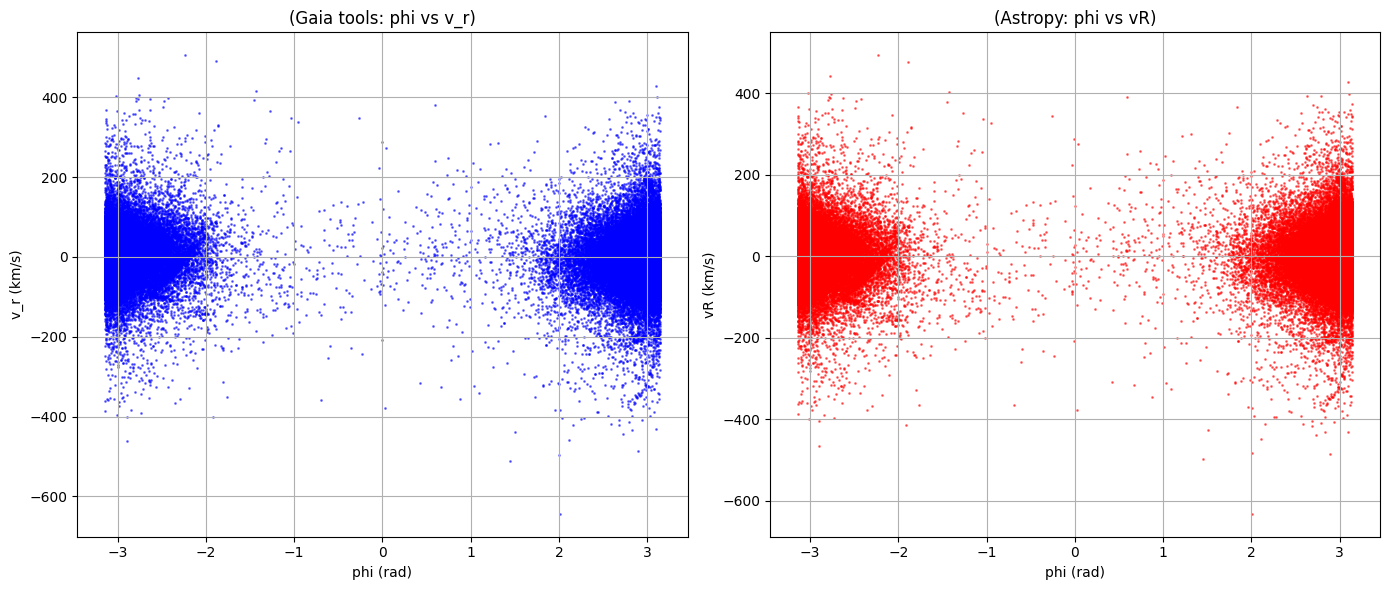

In [57]:
import numpy as np

# Create figure to plot two plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Gaia tools data 
axes[0].scatter(galcen['phi'], galcen[('v_r')], s=1, alpha=0.5, color='blue')
axes[0].set_title('(Gaia tools: phi vs v_r)')
axes[0].set_xlabel('phi (rad)')
axes[0].set_ylabel('v_r (km/s)')
#axes[0].xaxis.set_major_locator(plt.MultipleLocator(1000))  # Major ticks at every 1000 pc
#axes[0].yaxis.set_major_locator(plt.MultipleLocator(1000))  # Major ticks at every 1000 pc
axes[0].grid(True)

# Second plot: Astropy
axes[1].scatter(data['phi'], data[('vR')], s=1, alpha=0.5, color='red')
axes[1].set_title('(Astropy: phi vs vR)')
axes[1].set_xlabel('phi (rad)')
axes[1].set_ylabel('vR (km/s)')
#axes[1].xaxis.set_major_locator(plt.MultipleLocator(1000))  # Major ticks at every 1000 pc
#axes[1].yaxis.set_major_locator(plt.MultipleLocator(1000))  # Major ticks at every 1000 pc
axes[1].grid(True)

# Adjust layout to prevent overlap

plt.tight_layout()

# Show both plots side by side
plt.show()



phi vs vphi

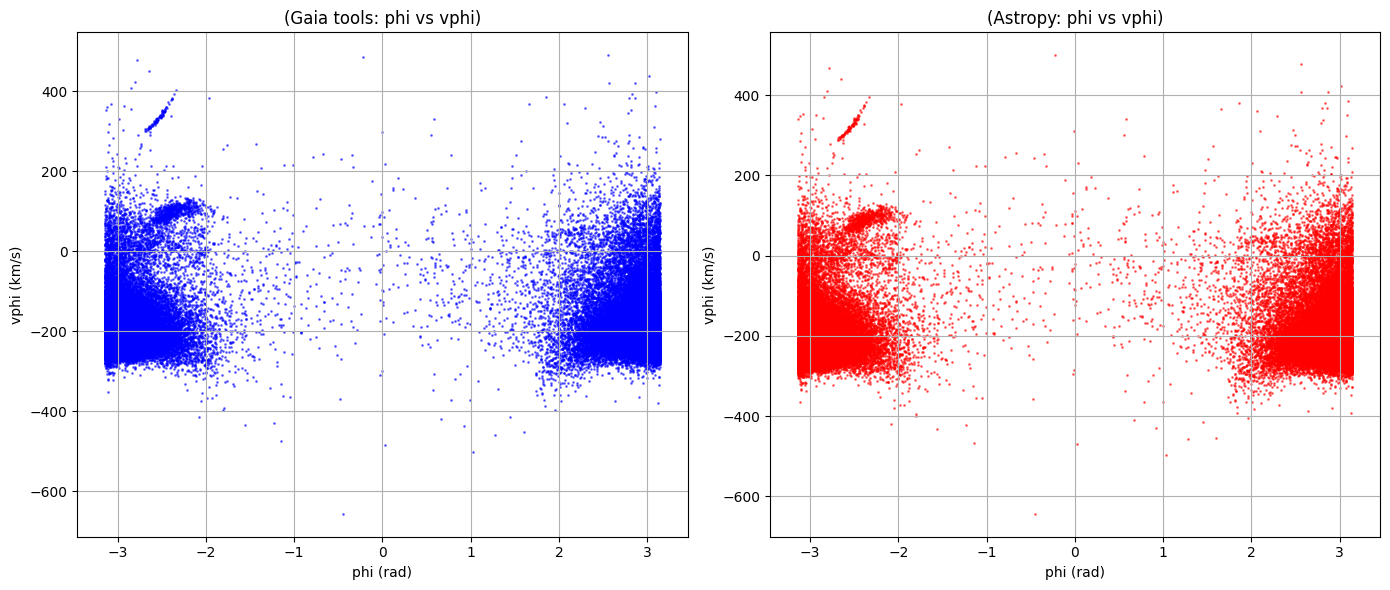

In [59]:
import numpy as np

# Create figure to plot two plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Gaia tools data 
axes[0].scatter(galcen['phi'], galcen[('v_phi')], s=1, alpha=0.5, color='blue')
axes[0].set_title('(Gaia tools: phi vs vphi)')
axes[0].set_xlabel('phi (rad)')
axes[0].set_ylabel('vphi (km/s)')
#axes[0].xaxis.set_major_locator(plt.MultipleLocator(1000))  # Major ticks at every 1000 pc
#axes[0].yaxis.set_major_locator(plt.MultipleLocator(1000))  # Major ticks at every 1000 pc
axes[0].grid(True)

# Second plot: Astropy
axes[1].scatter(data['phi'], data[('vphi')], s=1, alpha=0.5, color='red')
axes[1].set_title('(Astropy: phi vs vphi)')
axes[1].set_xlabel('phi (rad)')
axes[1].set_ylabel('vphi (km/s)')
#axes[1].xaxis.set_major_locator(plt.MultipleLocator(1000))  # Major ticks at every 1000 pc
#axes[1].yaxis.set_major_locator(plt.MultipleLocator(1000))  # Major ticks at every 1000 pc
axes[1].grid(True)

# Adjust layout to prevent overlap

plt.tight_layout()

# Show both plots side by side
plt.show()



phi vs v_z

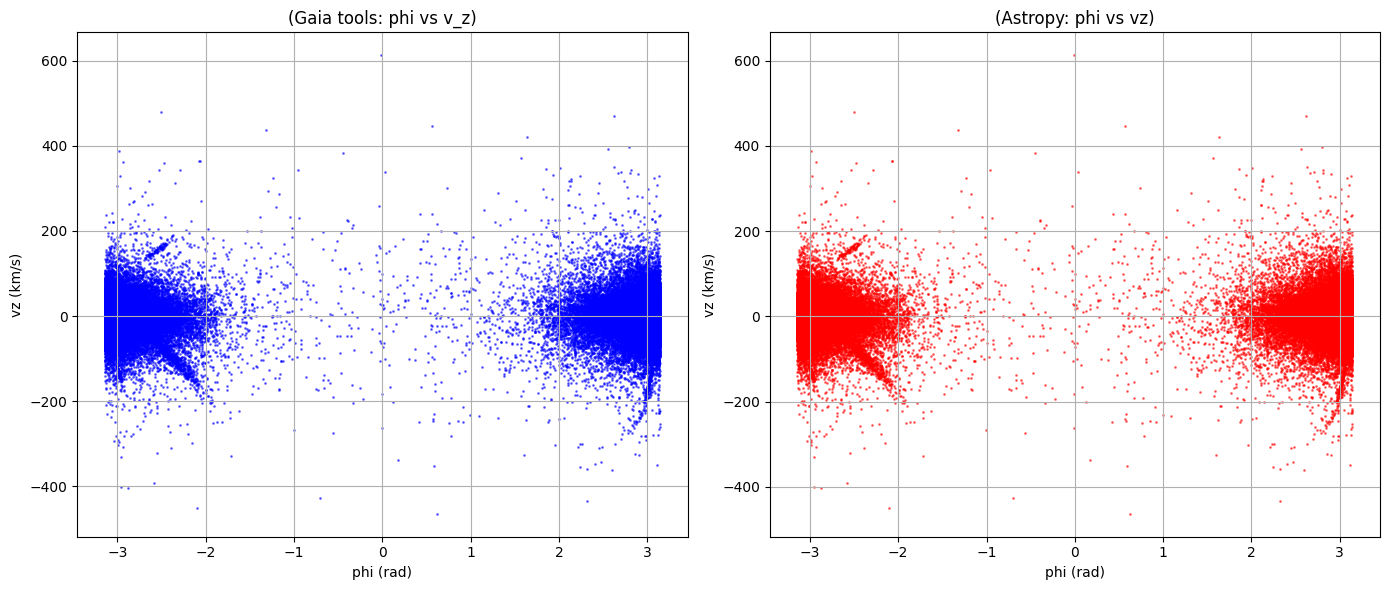

In [60]:
import numpy as np

# Create figure to plot two plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Gaia tools data 
axes[0].scatter(galcen['phi'], galcen[('v_z')], s=1, alpha=0.5, color='blue')
axes[0].set_title('(Gaia tools: phi vs v_z)')
axes[0].set_xlabel('phi (rad)')
axes[0].set_ylabel('vz (km/s)')
#axes[0].xaxis.set_major_locator(plt.MultipleLocator(1000))  # Major ticks at every 1000 pc
#axes[0].yaxis.set_major_locator(plt.MultipleLocator(1000))  # Major ticks at every 1000 pc
axes[0].grid(True)

# Second plot: Astropy
axes[1].scatter(data['phi'], data[('vz')], s=1, alpha=0.5, color='red')
axes[1].set_title('(Astropy: phi vs vz)')
axes[1].set_xlabel('phi (rad)')
axes[1].set_ylabel('vz (km/s)')
#axes[1].xaxis.set_major_locator(plt.MultipleLocator(1000))  # Major ticks at every 1000 pc
#axes[1].yaxis.set_major_locator(plt.MultipleLocator(1000))  # Major ticks at every 1000 pc
axes[1].grid(True)

# Adjust layout to prevent overlap

plt.tight_layout()

# Show both plots side by side
plt.show()

